In [122]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore, Back, Style
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [359]:
#importing data file

data = pd.read_csv(r"C:\Users\D\Desktop\mle\class 12 - linear regression + classification\Linear Regression - Bike Sharing Assignment\Day.csv")

In [360]:
data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [361]:
#checking descriptive statistics
#we find there are no missing values and if data is in normally distribution
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [362]:
#checking row, columns
data.shape

(730, 12)

In [363]:
#cheking total missing
data.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [364]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [365]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [366]:
#checking for individual columns
for col in data.columns : 
    print(data[col].describe())

count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64
count    730.000000
mean       0.500000
std        0.500343
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: yr, dtype: float64
count    730.000000
mean       6.526027
std        3.450215
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: mnth, dtype: float64
count    730.000000
mean       0.028767
std        0.167266
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: holiday, dtype: float64
count    730.000000
mean       2.995890
std        2.000339
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        6.000000
Name: weekday, dtype: float64
count    730.000000
mean       0.690411
std        0.462641

In [367]:
#creating dependent variable
y=data['cnt']
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
725    2114
726    3095
727    1341
728    1796
729    2729
Name: cnt, Length: 730, dtype: int64

In [368]:
#Visually inpecting relatioships between dependent and indpendent variables

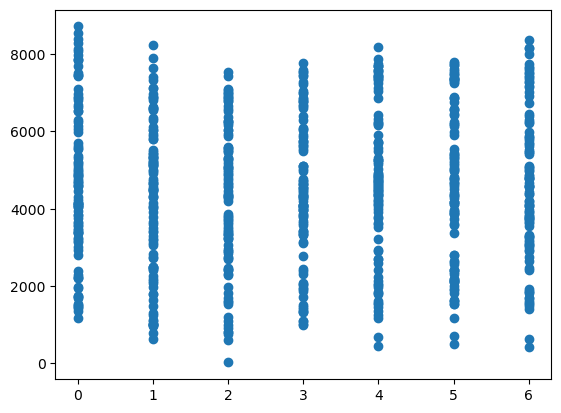

In [369]:
plt.scatter(data['weekday'],data['cnt'])
plt.show()

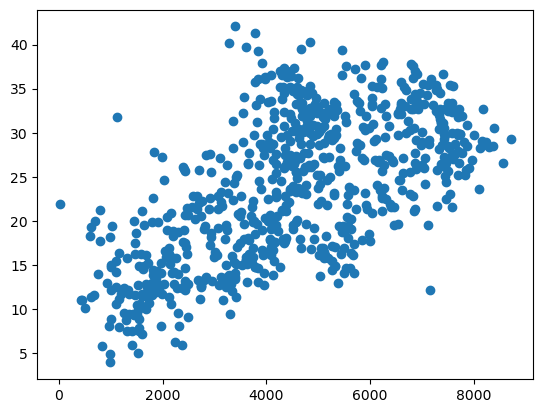

In [370]:
plt.scatter(data['cnt'],data['atemp'])

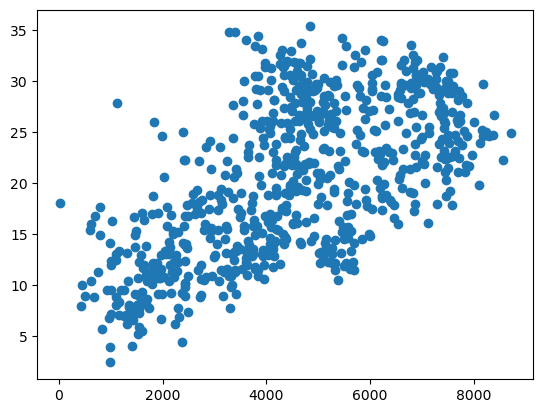

In [371]:
plt.scatter(data['cnt'],data['temp'])


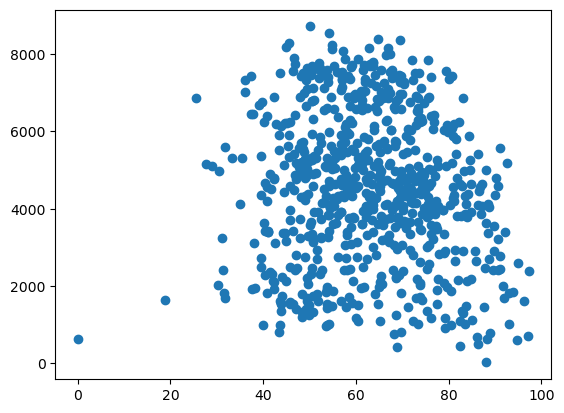

In [372]:
plt.scatter(data['hum'],data['cnt'])

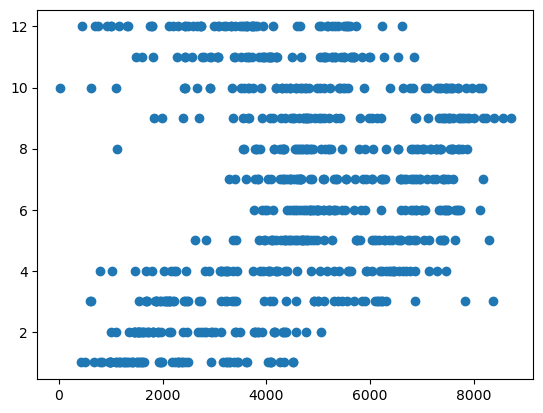

In [373]:
plt.scatter(data['cnt'],data['mnth'])

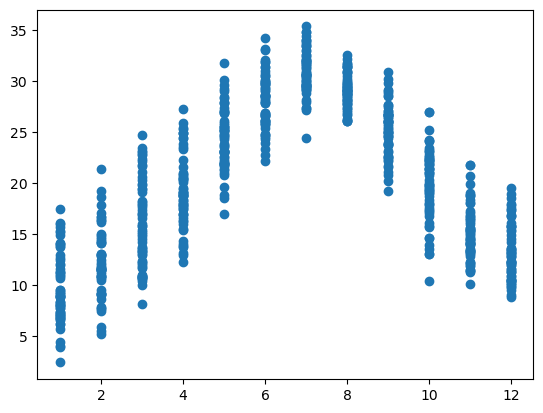

In [374]:
plt.scatter(data['mnth'],data['temp'])

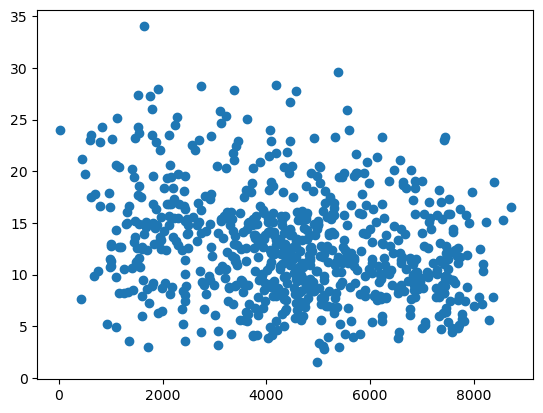

In [375]:
plt.scatter(data['cnt'],data['windspeed'])

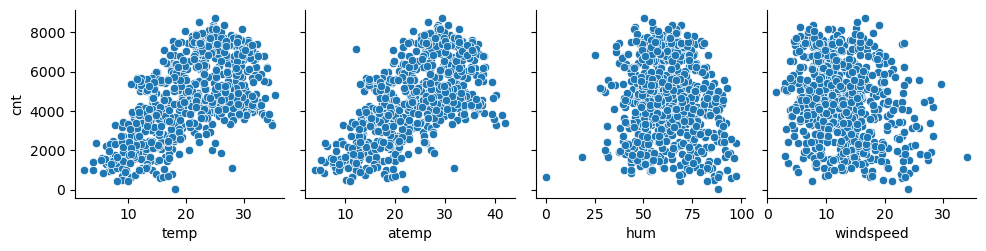

In [376]:
#pairplot to check highest correlation
sns.pairplot(data=data, x_vars=['temp','atemp','hum','windspeed'], y_vars=['cnt'])

C:\Users\D\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\D\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\D\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

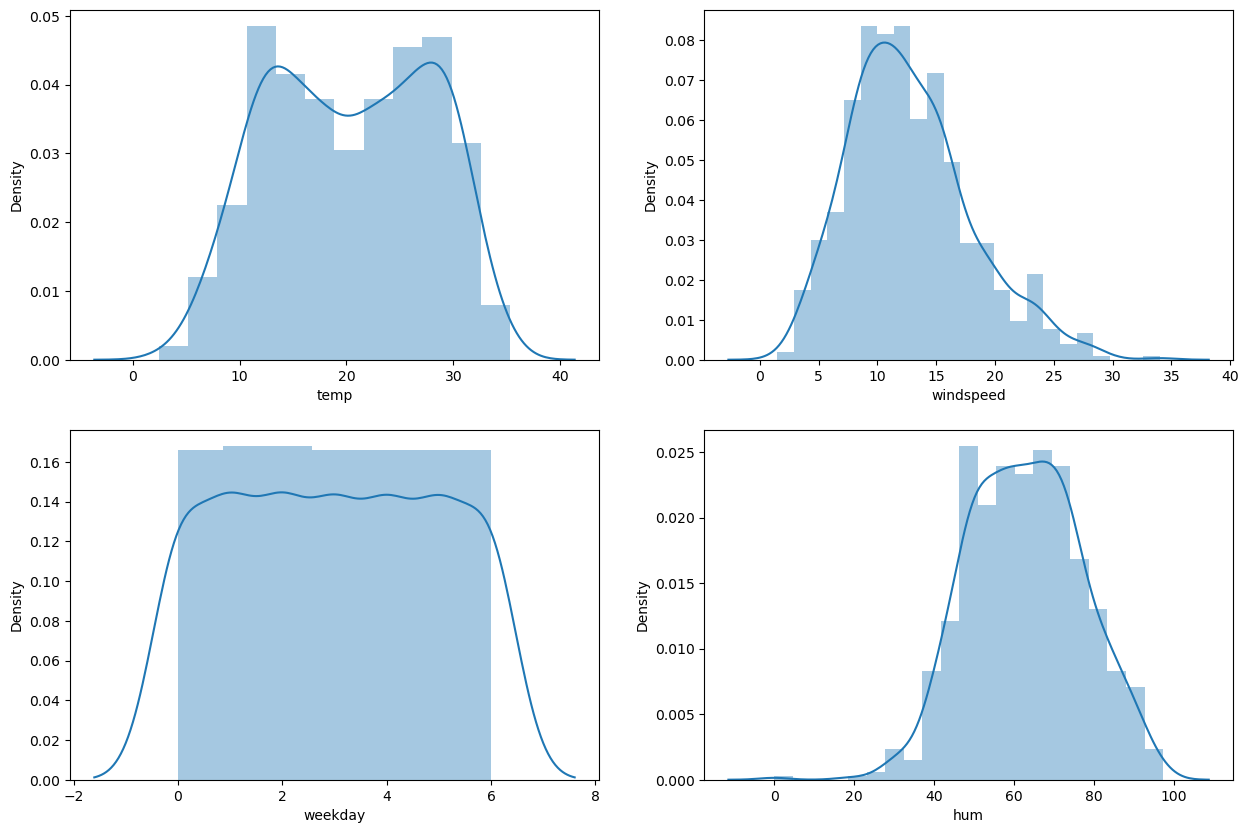

In [377]:
num_cols = ["temp",'windspeed','weekday','hum']

plt.figure(figsize = (15,10))

for idx,col in enumerate(num_cols):
    plt.subplot(2,2,idx+1)
    sns.distplot(data[col])

<AxesSubplot:xlabel='windspeed'>

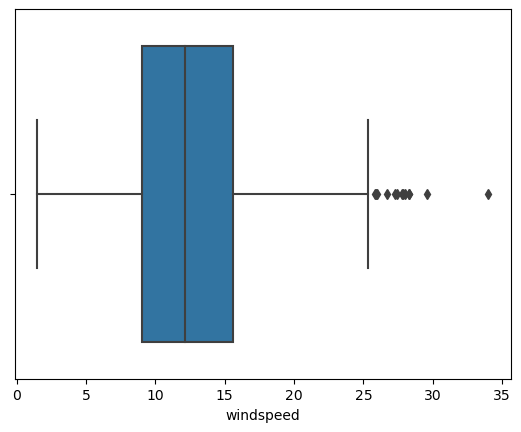

In [378]:
#checking for outliers
sns.boxplot(x='windspeed', data=data)

In [379]:
out_w = np.where(data['windspeed']>25)
data.drop(out_w[0], inplace=True)

In [380]:
data.shape

(713, 12)

<AxesSubplot:xlabel='temp'>

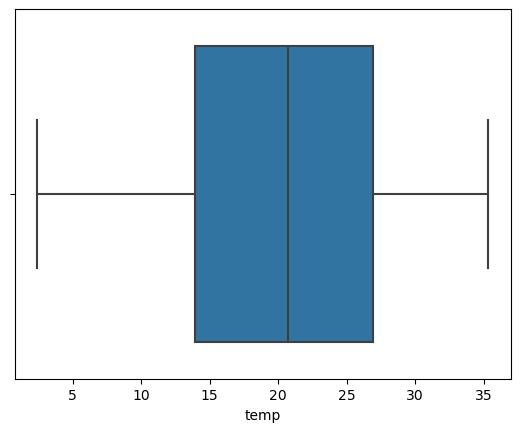

In [381]:
sns.boxplot(x='temp', data=data)
#no outliers detected

<AxesSubplot:xlabel='hum'>

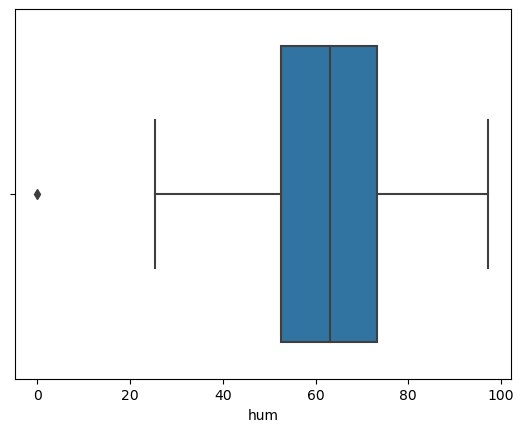

In [382]:
sns.boxplot(x='hum', data=data)

In [383]:
out_h = np.where(data['hum']<25)
data.drop(out_h[0], inplace= True)
data.shape

(712, 12)

<AxesSubplot:xlabel='atemp'>

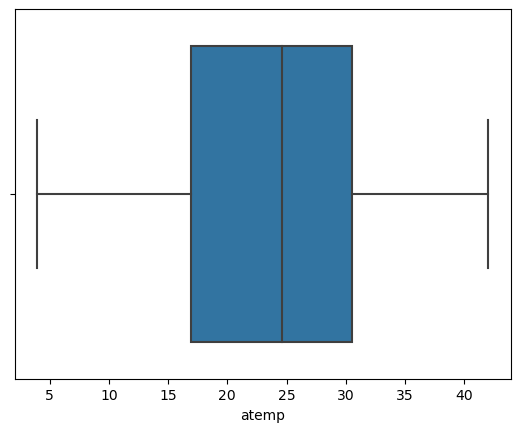

In [384]:
sns.boxplot(x='atemp', data=data)
#no outliers

<AxesSubplot:xlabel='hum', ylabel='Count'>

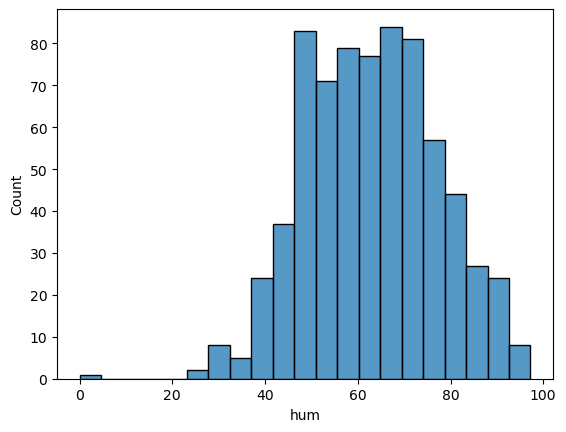

In [385]:
sns.histplot(data[col])

In [386]:
#checking correlation
data.corr()
abs(data.corr()>0.8)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,True,False,True,False,False,False,False,False,False,False,False,False
yr,False,True,False,False,False,False,False,False,False,False,False,False
mnth,True,False,True,False,False,False,False,False,False,False,False,False
holiday,False,False,False,True,False,False,False,False,False,False,False,False
weekday,False,False,False,False,True,False,False,False,False,False,False,False
workingday,False,False,False,False,False,True,False,False,False,False,False,False
weathersit,False,False,False,False,False,False,True,False,False,False,False,False
temp,False,False,False,False,False,False,False,True,True,False,False,False
atemp,False,False,False,False,False,False,False,True,True,False,False,False
hum,False,False,False,False,False,False,False,False,False,True,False,False


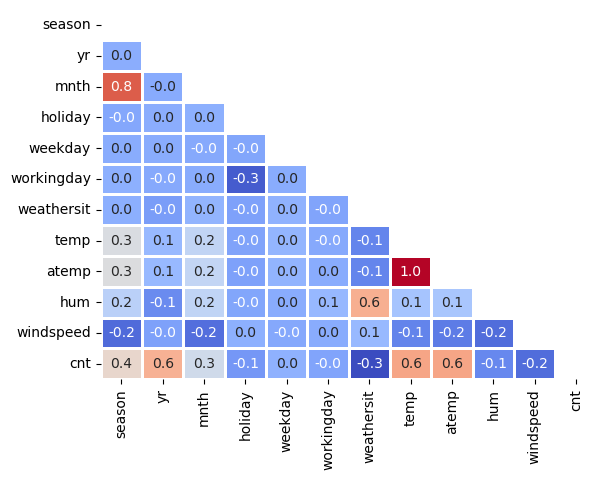

In [387]:
#checking for multicollinearity
corrMatrix = data.corr()
mask = np.triu(corrMatrix)
sns.heatmap(corrMatrix,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',            
            mask=mask,
            linewidths=1,
            cbar=False)
plt.show()

In [251]:
#temp and atemp have high correlation
#month and season have high correlation



C:\Users\D\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt', ylabel='Density'>

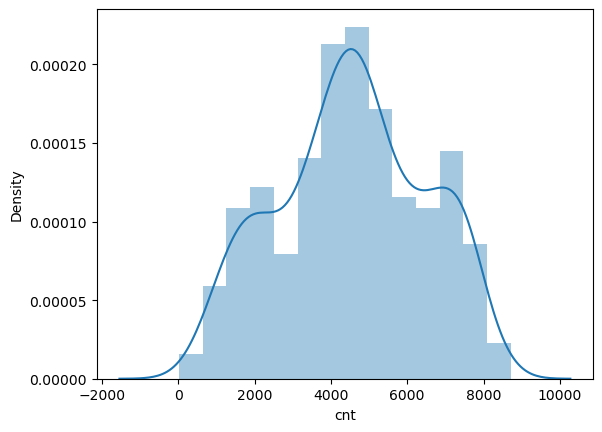

In [388]:
#checking normal distribution of dependent variable. conclusion- almost normaly distributed
sns.distplot(data['cnt'])

In [171]:
def univariate(feat):
    count = data[feat].value_counts() 
    print("--------------------" + feat + " Distribution (counts)------------------")
    print(count) 
      
    plt.figure(figsize = (8,6))
    if feat == "season":
        plt.bar(count.index, count.values,color = ['g','b','y','r'])
    else:
        plt.bar(count.index, count.values,color = ['g','b'])
        
    plt.show()

--------------------season Distribution (counts)------------------
3    188
2    184
1    180
4    178
Name: season, dtype: int64


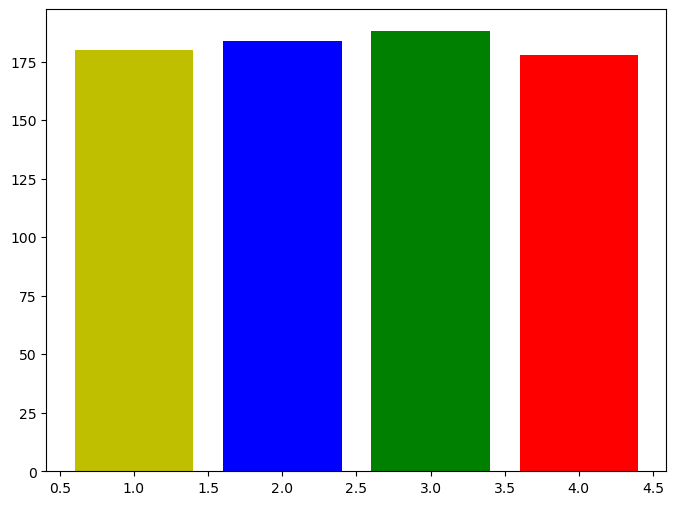

In [172]:
univariate("season")

--------------------holiday Distribution (counts)------------------
0    709
1     21
Name: holiday, dtype: int64


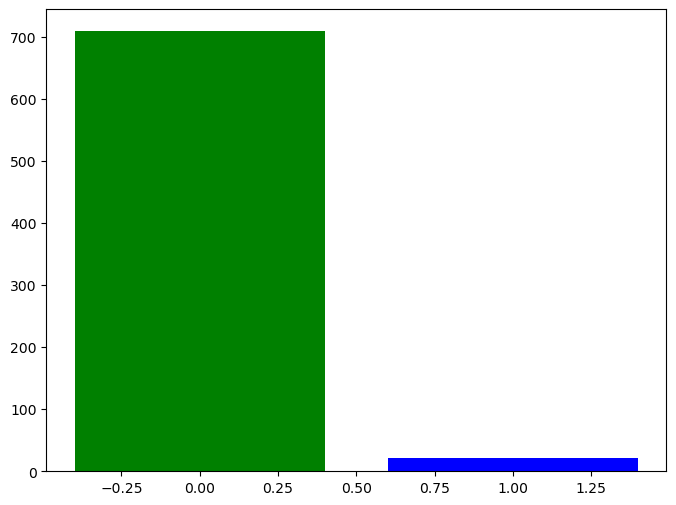

In [173]:
univariate('holiday')

--------------------weathersit Distribution (counts)------------------
1    463
2    246
3     21
Name: weathersit, dtype: int64


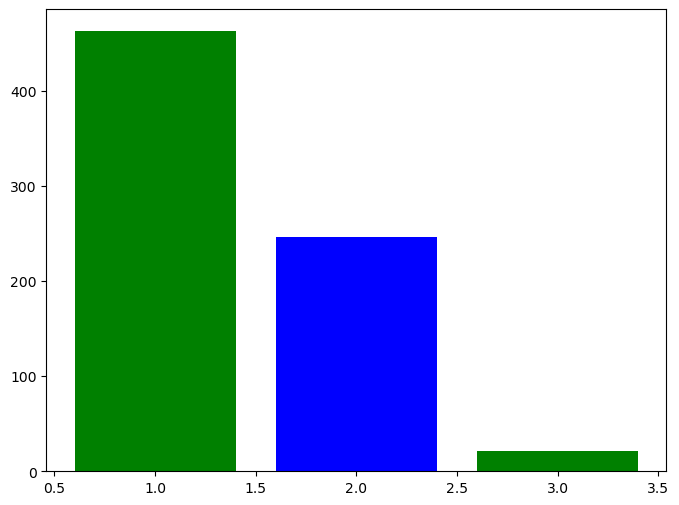

In [174]:
univariate('weathersit')

--------------------workingday Distribution (counts)------------------
1    504
0    226
Name: workingday, dtype: int64


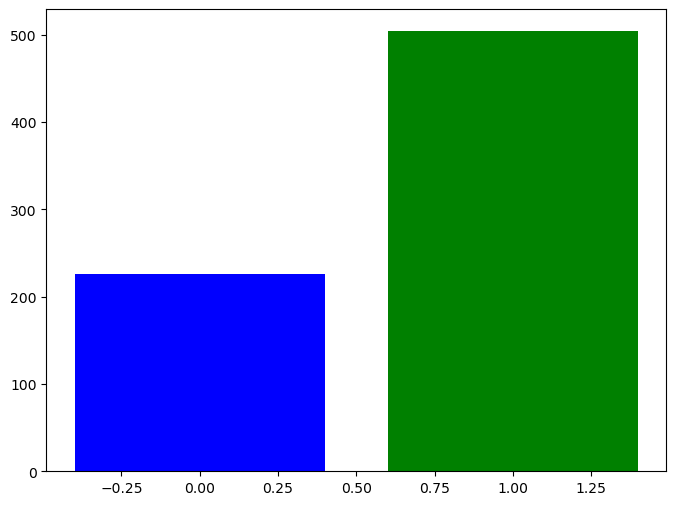

In [175]:
univariate('workingday')

C:\Users\D\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workingday', ylabel='count'>

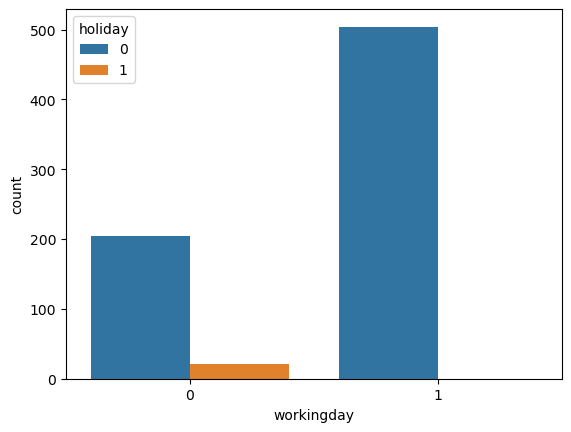

In [176]:
#to check if non-working day is a holiday
sns.countplot(data.workingday,hue=data.holiday)

In [389]:
#fixing categorical values
data.head()
data.shape


(712, 12)

In [390]:
#creating dummy variable for weekday
dummies = pd.get_dummies(data['weekday'],prefix='wd',drop_first =True)
data = pd.concat([data, dummies], axis=1)

In [391]:
data.shape

(712, 18)

In [392]:
#creating dummy variable for season
data.head()
dummies = pd.get_dummies(data['season'],prefix='sn',drop_first =True)
data = pd.concat([data, dummies], axis=1)

In [393]:
data.shape

(712, 21)

In [394]:
#creating dummy variable for month
dummies = pd.get_dummies(data['mnth'],prefix='mnth',drop_first =True)
data = pd.concat([data, dummies], axis=1)

In [395]:
data.shape

(712, 32)

In [399]:
data.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0


In [400]:
#creating dummy variable for weathersit
data.head()
dummies = pd.get_dummies(data['weathersit'],prefix='wth',drop_first =True)
data = pd.concat([data, dummies], axis=1)

In [401]:
data.shape

(712, 34)

In [402]:
#checking correlation
data.corr()
abs(data.corr()>0.8)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,wth_2,wth_3
season,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
yr,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
mnth,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
holiday,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weekday,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
workingday,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weathersit,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
temp,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
atemp,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
hum,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [403]:
#splitting into train and test

X=data.drop('cnt',axis = 1).drop('atemp',axis = 1).drop('mnth',axis = 1).drop('season',axis = 1).drop('weekday',axis = 1).drop('weathersit',axis = 1)   #indep var
y=data['cnt']                    #dep var

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)      #splitting into (70-30)%

In [404]:
#using linear regression
L_reg=LinearRegression()

In [405]:
#Fit model
L_reg.fit(X_train,y_train)

LinearRegression()

In [406]:
#intercept value
L_reg.intercept_

2032.0752443626357

In [407]:
#coefficient value
L_reg.coef_

array([ 2000.43297706,  -296.59376025,   186.10074303,   100.52114451,
         -14.23929834,   -40.45010725,  -556.67750733,  -559.78453728,
        -410.11091669,  -232.40551944,  -256.24169929,  -110.99280974,
         727.26963523,   578.22700918,  1409.58360425,   207.69658932,
         571.07316979,   616.3990729 ,  1004.45573283,   801.30458255,
         542.23554667,   914.29038887,  1262.85174584,   766.16315401,
         150.46710249,    48.29663646,  -384.67907052, -1943.24025343])

In [408]:
#Prediction
y_pred = L_reg.predict(X_test)

Text(0.5, 0, 'Index')

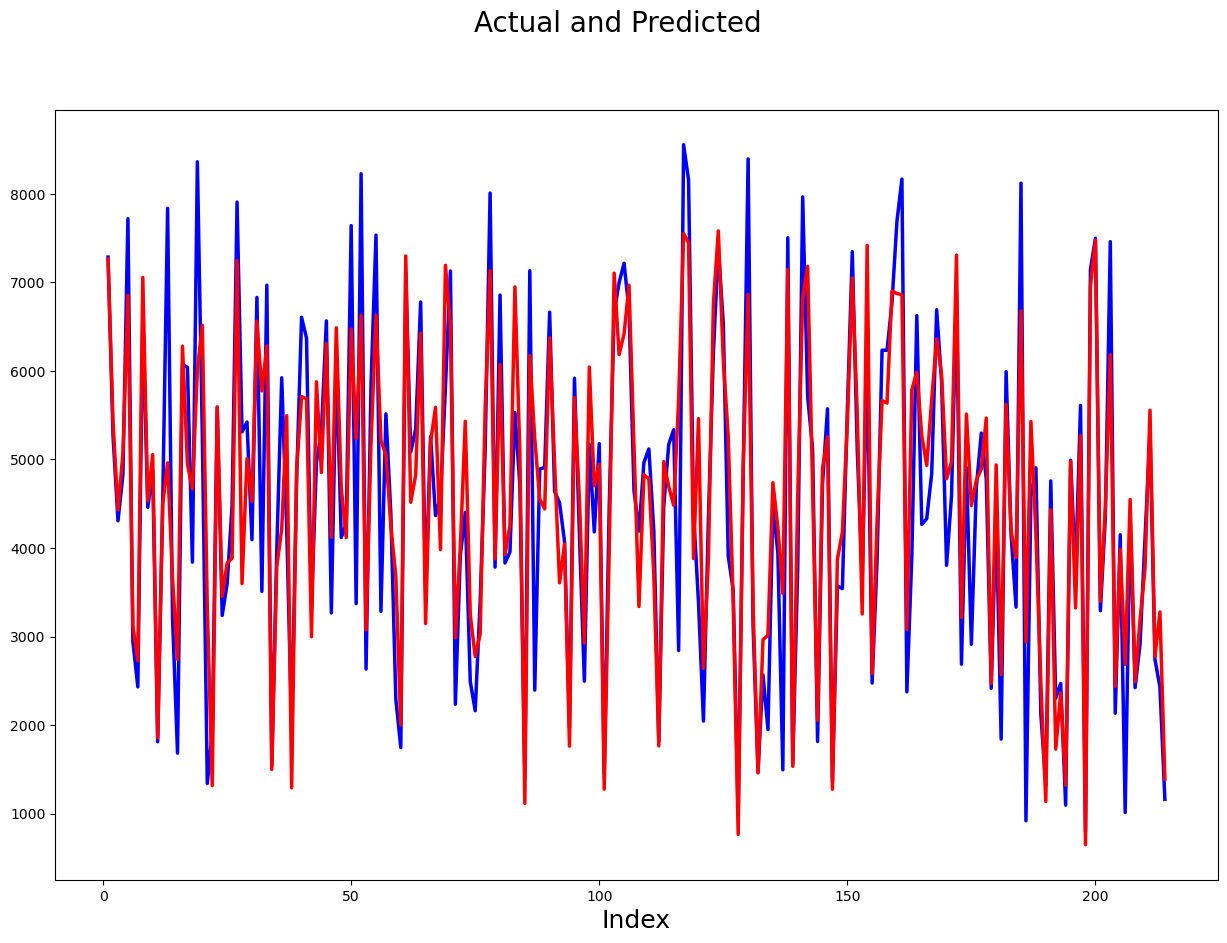

In [409]:
#Checkiing model visually


plt.figure(figsize = (15,10))

c = [i for i in range(1,len(X_test.index)+1,1)] # generating index

plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red", linewidth=2.5, linestyle="-")
plt.suptitle('Actual and Predicted', fontsize=20) 
plt.xlabel('Index', fontsize=18) 

C:\Users\D\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Check for Linearity:\n Actual Vs Predicted value')

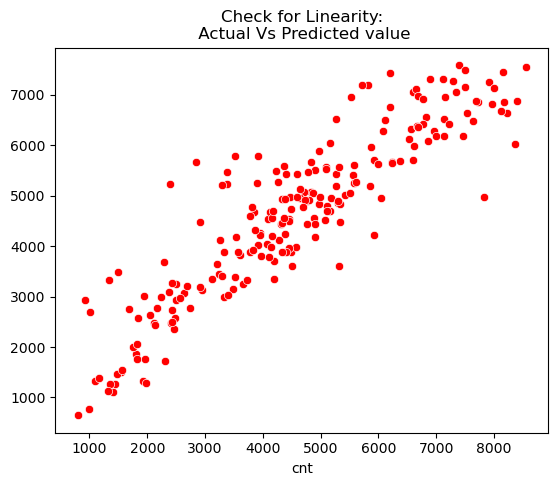

In [410]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

In [411]:
import statsmodels.api as sm


In [412]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit the resgression line using 'OLS'
L_reg = sm.OLS(y_train, X_train_sm).fit()

In [413]:
print(L_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     107.0
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          5.43e-184
Time:                        23:15:34   Log-Likelihood:                -3981.0
No. Observations:                 498   AIC:                             8020.
Df Residuals:                     469   BIC:                             8142.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2032.0752    264.747      7.676      0.0

In [414]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,workingday,65.50
0,const,63.94
11,wd_5,40.97
10,wd_4,39.23
8,wd_2,36.60
7,wd_1,35.94
9,wd_3,35.35
14,sn_3,11.79
21,mnth_7,9.73
22,mnth_8,9.59


In [415]:
X_train_sm.drop("workingday",1,inplace=True)

# Fit the resgression line using 'OLS'
L_reg = sm.OLS(y_train, X_train_sm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     181.5
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          1.82e-166
Time:                        23:16:00   Log-Likelihood:                -4185.4
No. Observations:                 511   AIC:                             8395.
Df Residuals:                     499   BIC:                             8446.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2036.7135    285.953      7.123      0.0

C:\Users\D\AppData\Local\Temp\ipykernel_10984\914401046.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_sm.drop("workingday",1,inplace=True)


In [416]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.91
13,sn_3,11.79
20,mnth_7,9.73
21,mnth_8,9.58
18,mnth_5,7.75
14,sn_4,7.68
12,sn_2,7.36
3,temp,7.09
19,mnth_6,6.90
22,mnth_9,6.61


In [417]:

#X_train_sm.drop("temp",1,inplace=True)

# Fit the resgression line using 'OLS'
#L_reg = sm.OLS(y_train, X_train_sm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     181.5
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          1.82e-166
Time:                        23:18:11   Log-Likelihood:                -4185.4
No. Observations:                 511   AIC:                             8395.
Df Residuals:                     499   BIC:                             8446.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2036.7135    285.953      7.123      0.0

C:\Users\D\AppData\Local\Temp\ipykernel_10984\2236792360.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_sm.drop("temp",1,inplace=True)


In [418]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,60.46
12,sn_3,11.65
13,sn_4,7.64
11,sn_2,7.35
20,mnth_8,6.87
19,mnth_7,6.51
17,mnth_5,5.49
23,mnth_11,5.39
21,mnth_9,5.19
22,mnth_10,4.86


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     181.5
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          1.82e-166
Time:                        15:31:54   Log-Likelihood:                -4185.4
No. Observations:                 511   AIC:                             8395.
Df Residuals:                     499   BIC:                             8446.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2036.7135    285.953      7.123      0.0

C:\Users\D\AppData\Local\Temp\ipykernel_10984\3142654909.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_sm.drop("hum",1,inplace=True)


In [426]:
L_reg.params

const        2562.587113
yr           2078.140924
holiday      -373.053406
hum            -6.713056
windspeed     -37.770127
wd_1         -437.688313
wd_2         -397.637330
wd_3         -245.947014
wd_4           31.778655
wd_5          -28.031984
wd_6          -53.680411
sn_2          665.425337
sn_3          817.738228
sn_4         1538.256477
mnth_2        446.999497
mnth_3       1180.241224
mnth_4       1513.700351
mnth_5       2454.123153
mnth_6       2545.591727
mnth_7       2361.673658
mnth_8       2534.023531
mnth_9       2523.388813
mnth_10      1558.765793
mnth_11       491.122992
mnth_12       282.220798
wth_2        -515.320423
wth_3       -2300.953964
dtype: float64

In [419]:
#Model Evaluation

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.8081361955494069

In [424]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,wth_2,wth_3
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [425]:
X.head()

,yr,holiday,workingday,temp,hum,windspeed,wd_1,wd_2,wd_3,wd_4,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,wth_2,wth_3
0,0,0,1,14.110847,80.5833,10.749882,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
